# Data Wrangling 

### 2.1 Introduction

This step focuses on collecting data, organizing it, and making sure it's well defined in the following 4 areas of Data Preparation:

    #1 - Data Load
    #2 - Data Organzation
    #3 - Data Definition
    #4 - Data Cleaning

### 2.1.1 Recap Of Data Science Problem

The purpose of this project is to select the top candidates with the most valuable skills. The low and out-of-range salaries for a job type have made it challenging to attract the best talents. This model will be used to provide guidance for It-Talent.com HR Department to attract the best talents for future Job placement opportunities.



### 2.1.2 Imports

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import os

from library.sb_utils import save_file

### 2.2 Objectives

    Additional Comments:
    Identified the required target value?
    Do I have potentially useful features?
    Do I have any fundamental issues with the data?

In [136]:
#Check the path to the directory where you are currently in
%pwd

'C:\\Users\\narci\\DS-Plus\\Springboard-main\\Git\\Notebooks\\Capstone-2'

### 2.2.1 Data Load

In [137]:
my_path = 'C:\\Users\\narci\\DS-Plus\\Springboard-main\\Git\\Notebooks\\Capstone-2'

In [138]:
Train_data = pd.read_csv(f'{my_path}/Train_rev1.csv')
print(Train_data.shape)
Train_data.head(4)

(244768, 12)


,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk


In [139]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244767 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


### 2.3  Data Organzation

In [140]:
#Using a 15% split 
#for the test set may change, if the actual test set size is predefined. 
#In any case we will make sure the test set we choose from our dataset 
#is as similar as it can get to the actual data that it will see in 
#production'''


def mydf_splitter(Train_data,num_rows):
    return Train_data[:num_rows].copy(),Train_data[num_rows:]


mydf_train_valid,mydf_test = mydf_splitter(Train_data,1100)

print(mydf_train_valid.shape,mydf_test.shape)

(1100, 12) (243668, 12)


In [141]:
#dataframe filter to display just a row  with the title

Train_data[Train_data.Title == 'Modelling and simulation analyst'].T

,2
Id,12612844
Title,Modelling and simulation analyst
FullDescription,Mathematical Modeller / Simulation Analyst / O...
LocationRaw,"Hampshire, South East, South East"
LocationNormalized,Hampshire
ContractType,NaN
ContractTime,permanent
Company,Gregory Martin International
Category,Engineering Jobs
SalaryRaw,20000 - 40000/annum 20-40K


### Comments

The output above suggests the data organized. Plausible column headings. And I can already see a missing value in the 6th column - Contract Type.

### 2.3.1 Number of Missing Values By Column

Count the number of missing values in each column and sort them.

In [142]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#Train_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'

missing = pd.concat([Train_data.isnull().sum(), 100 * Train_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
Id,0,0.000000
FullDescription,0,0.000000
LocationRaw,0,0.000000
LocationNormalized,0,0.000000
Category,0,0.000000
SalaryRaw,0,0.000000
SalaryNormalized,0,0.000000
Title,1,0.000409
SourceName,1,0.000409
Company,32430,13.249281


### Comments

   ContractType has the most missing values, at just over 73%. Company and ContractTime is missing values from 13% and 26%.

### 2.4.  Finding Duplicates

In [143]:
#Use to find any duplicates
Train_data['Title'].value_counts().head()

Business Development Manager    921
Project Manager                 749
Management Accountant           661
Sales Executive                 603
Account Manager                 540
Name: Title, dtype: int64

### Comments

The duplicates found in JoB Title does not require removing nor cleaning.

### 2.4.1 Examine and inspect categorical features

In [144]:
#Examine datatype to mark which data type will play a role in model
Train_data.dtypes

Id                     int64
Title                 object
FullDescription       object
LocationRaw           object
LocationNormalized    object
ContractType          object
ContractTime          object
Company               object
Category              object
SalaryRaw             object
SalaryNormalized       int64
SourceName            object
dtype: object

### 2.4.2 Use IQR rule to identify potential outliers

In [145]:
stat = Train_data.SalaryNormalized.describe()
print(stat)
IQR = stat['75%']-stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper an lower bounds for suspected outliers are {} and {}.'.format(upper, lower))


count    244768.000000
mean      34122.577576
std       17640.543124
min        5000.000000
25%       21500.000000
50%       30000.000000
75%       42500.000000
max      200000.000000
Name: SalaryNormalized, dtype: float64
The upper an lower bounds for suspected outliers are 74000.0 and -10000.0.


### 2.4.3. Examine potential outlier below lower bound

In [146]:
#check potential outlier below lower bound
Train_data[Train_data.SalaryNormalized < 8.5]

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName


In [147]:
#check potential outlier above upper bound
Train_data.loc[Train_data.SalaryNormalized > 222.5, 'Category'].value_counts()

IT Jobs                             38483
Engineering Jobs                    25174
Accounting & Finance Jobs           21846
Healthcare & Nursing Jobs           21076
Sales Jobs                          17272
Other/General Jobs                  17055
Teaching Jobs                       12637
Hospitality & Catering Jobs         11351
PR, Advertising & Marketing Jobs     8854
Trade & Construction Jobs            8837
HR & Recruitment Jobs                7713
Admin Jobs                           7614
Retail Jobs                          6584
Customer Services Jobs               6063
Legal Jobs                           3939
Manufacturing Jobs                   3765
Logistics & Warehouse Jobs           3633
Social work Jobs                     3455
Consultancy Jobs                     3263
Travel Jobs                          3126
Scientific & QA Jobs                 2489
Charity & Voluntary Jobs             2332
Energy, Oil & Gas Jobs               2255
Creative & Design Jobs            

In [148]:
#check most suspicious potential outliers above upper bound
Train_data[(Train_data.SalaryNormalized > 222.5) & (Train_data.Category == 'IT Jobs')]

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
31,27527047,C/C++ Developer,A leading company that provides stock market a...,London,London,NaN,permanent,Indigo 21 Ltd,IT Jobs,25000 - 40000/annum,32500,cv-library.co.uk
32,27527050,Senior PHP Developer,A skilled Senior PHP Developer is required by ...,"Central London, London",Central London,NaN,permanent,Indigo 21 Ltd,IT Jobs,40000 - 50000/annum,45000,cv-library.co.uk
33,27527063,Senior Website Designer,"SENIOR WEBSITE DESIGNER Location: York, East Y...","York, North Yorkshire",York,NaN,permanent,Indigo 21 Ltd,IT Jobs,20000 - 30000/annum,25000,cv-library.co.uk
34,27527077,Business Development Manager,"The Company: Our client are a full service, cr...","Tyne Wear, North East",Newcastle Upon Tyne,NaN,permanent,Asset Appointments,IT Jobs,18000 - 24000/annum plus commission OTE 50-60k,21000,cv-library.co.uk
38,27754996,QA Engineer,An expanding software and consultancy services...,"Cambridge, Cambridgeshire",Cambridge,NaN,permanent,Indigo 21 Ltd,IT Jobs,20000 - 40000/annum,30000,cv-library.co.uk
...,...,...,...,...,...,...,...,...,...,...,...,...
244322,72695854,Mid / Senior Software Developer Shropshire ****k,Mid/Senior Software Developer Shropshire ****k...,Shropshire,Shropshire,NaN,permanent,Exposed Solutions Ltd,IT Jobs,30k - 35k pa,32500,jobsite.co.uk
244325,72695864,Junior Trainer,Junior IT Trainer Top 20 UK Law Firm Central...,City of London,The City,NaN,permanent,Venturi Ltd,IT Jobs,32000.00 - 33k pa + FULL BEN EFITS,32500,jobsite.co.uk
244334,72695898,PHP Software Developer,PHP Software Developer Glasgow Eden Scott s cl...,Glasgow,Glasgow,NaN,permanent,Eden Scott Ltd,IT Jobs,25k - 30k pa + benefits,27500,jobsite.co.uk
244336,72695902,MI Analyst (Reporting Analyst) Trainee,MI Analyst (Reporting Analyst) Trainee. Excel...,Surrey,Surrey,NaN,permanent,Randstad Technologies Limited,IT Jobs,25000.00 - 30000.00 pa,27500,jobsite.co.uk


### Comments

These missing enteries in Contract type do not appear to affect the dataset. I am confident that the missing data and should be removed from the training set.


The high-salary potential outliers all appear to be legitmate data. Most roles are Top I.T. roles in the industries are well known for high salaries. I am determining that these entries are to be legimate and will not remove them.

### 2.4.4 Number Of Missing Values by bar Chart

<AxesSubplot:xlabel='IT-Talent.com', ylabel='Percent missing'>

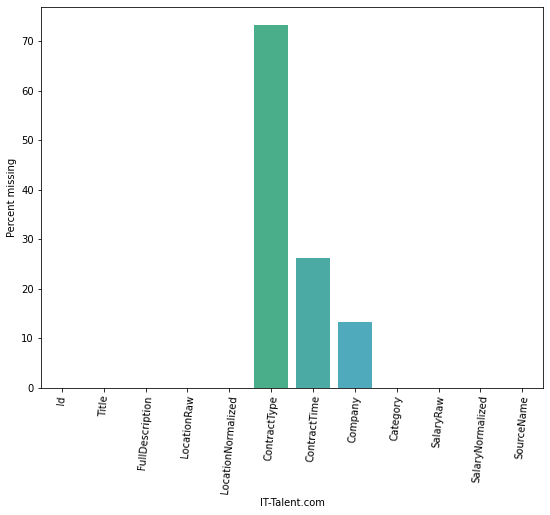

In [149]:
null_vals = Train_data.isnull().sum()/len(Train_data)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["IT-Talent.com","Percent missing"]
plt.figure(figsize = (9,7))
plt.xticks(rotation=85)
sns.barplot(x ="IT-Talent.com",y ="Percent missing",data = null_vals)

### 2.4.5 Data Definition - (Take a deeper look at the data)

In [150]:
#Call the info method on train_data to see a summary of the data.info 
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244767 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


In [151]:
Train_data.select_dtypes('object')

,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SourceName
0,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,cv-library.co.uk
1,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,cv-library.co.uk
2,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,cv-library.co.uk
3,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,cv-library.co.uk
4,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,cv-library.co.uk
...,...,...,...,...,...,...,...,...,...,...
244763,TEACHER OF SCIENCE,Position: Qualified Teacher Subject/Specialism...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,hays.co.uk
244764,TEACHER OF BUSINESS STUDIES AND ICT,Position: Qualified Teacher or NQT Subject/Spe...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,hays.co.uk
244765,ENGLISH TEACHER,Position: Qualified Teacher Subject/Specialism...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,hays.co.uk
244766,SUPPLY TEACHERS,Position: Qualified Teacher Subject/Specialism...,Wiltshire,Wiltshire,NaN,contract,NaN,Teaching Jobs,450 to 500 per week,hays.co.uk


### 2.5. Data Cleaning: Scrubbing Data 

In [152]:
def Scrub_Data(data, columns, axis, vals, names):
    #drop useless columns
    data = data.drop(columns, axis = 1)
    #detect the missing data
    missingcounts = data.isnull().sum()
    missingcols = [col for col in missingcounts.keys() if missingcounts[col] != 0]
    #fill the missing data with specific values
    values = dict(zip(missingcols, vals))
    data = data.fillna(value = values)
    #rename the columns
    data.columns = names
    return data


In [153]:
#drop useless columns
Train_data = Train_data.drop(["ContractType", "ContractTime","Company"], axis = 1)
#rename the columns
names = ["Job Code", "Title", "Job Description", "Region", "Location", "Category", "Salary_Range", "Actual_Salary","Source_Name"]
Train_data.columns = names


In [154]:
Train_data.head()

,Job Code,Title,Job Description,Region,Location,Category,Salary_Range,Actual_Salary,Source_Name
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [155]:
Train_data.isnull().sum()

Job Code           0
Title              1
Job Description    0
Region             0
Location           0
Category           0
Salary_Range       0
Actual_Salary      0
Source_Name        1
dtype: int64

### 2.6 Examine IT Job Market

In [156]:
ITJobs_Data = Train_data[(Train_data.Actual_Salary) & (Train_data.Category == 'IT Jobs')]

In [157]:
ITJobs_Data.head(6)

,Job Code,Title,Job Description,Region,Location,Category,Salary_Range,Actual_Salary,Source_Name
2487,55408230,Configuration Analyst,"Configuration Analyst, London, ****k DOE Confi...",London,London,IT Jobs,"From 40,000 to 49,999 per year + ( 40,000 - 49...",44999,planetrecruit.com
2503,55408436,"Data Centre Shift Lead, West London, up to ***...","Data Centre Shift Lead, West London, up to ***...",London,London,IT Jobs,"From 40,000 to 49,999 per year + ( 40,000 - 49...",44999,planetrecruit.com
2506,55408452,Website/Portal Systems Development Manager (Ja...,Website/Portal Systems Development ManagerLond...,London,London,IT Jobs,"From 70,000 to 79,999 per year + ( 70,000 - 79...",74999,planetrecruit.com
2508,55408456,B2B Telesales Executive,Are you an experienced Telesales Executive? If...,Gloucestershire,Gloucestershire,IT Jobs,"From 20,000 to 29,999 per year + ( 20,000 - 29...",24999,planetrecruit.com
2581,55409435,Application Team Leader,Essex County Fire & Rescue have a vacancy for ...,Essex,Essex,IT Jobs,"Up to 36,313 per year + 34549.00-36313.00",36313,planetrecruit.com
2627,55409778,Online Infrastructure Analyst,Job Title: Online Infrastructure Analyst Refer...,Buckinghamshire,Buckinghamshire,IT Jobs,"From 30,000 to 39,999 per year + ( 30,000 - 39...",34999,planetrecruit.com


In [158]:
# find any IT Title duplicates
ITJobs_Data['Title'].value_counts().head()

Business Development Manager            7
Test Analyst                            5
Oracle Technical Team Leader            5
IT Support Engineer                     5
Project Support Officer/Data Analyst    4
Name: Title, dtype: int64

### Comments

Duplicates found in IT Job Titles all have unique Job descriptions - No need to consolidate 

### 2.7 Histogram of all Job Salaries

<AxesSubplot:>

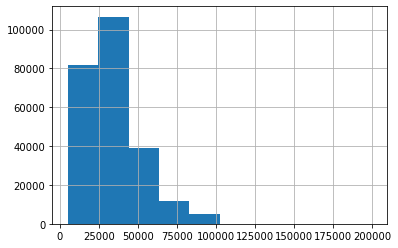

In [159]:
%matplotlib inline
Train_data.Actual_Salary.hist()

### 2.8 Histogram of IT Salaries

<AxesSubplot:>

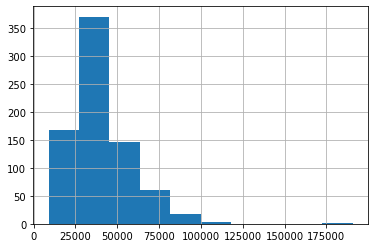

In [160]:
ITJobs_Data.Actual_Salary.hist()

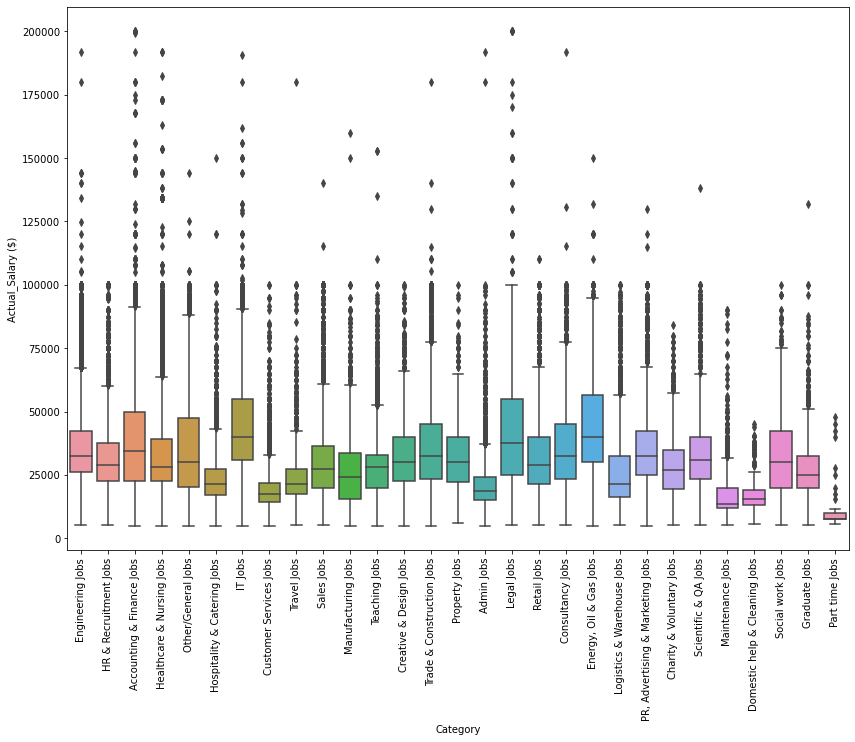

In [161]:
plt.subplots(figsize=(14, 10))
sns.boxplot(x='Category', y='Actual_Salary', data=Train_data)
plt.xticks(rotation='vertical')
plt.ylabel('Actual_Salary ($)')
plt.xlabel('Category');